In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Attribute Information:

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

bruises?: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

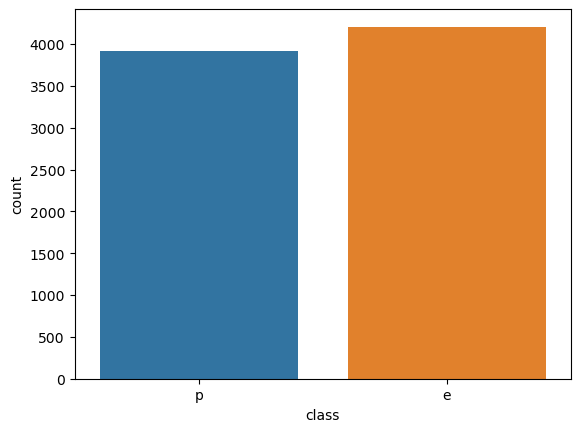

In [35]:
sns.countplot(data=df, x="class");

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
feat_uni = df.describe().transpose().reset_index().sort_values("unique")

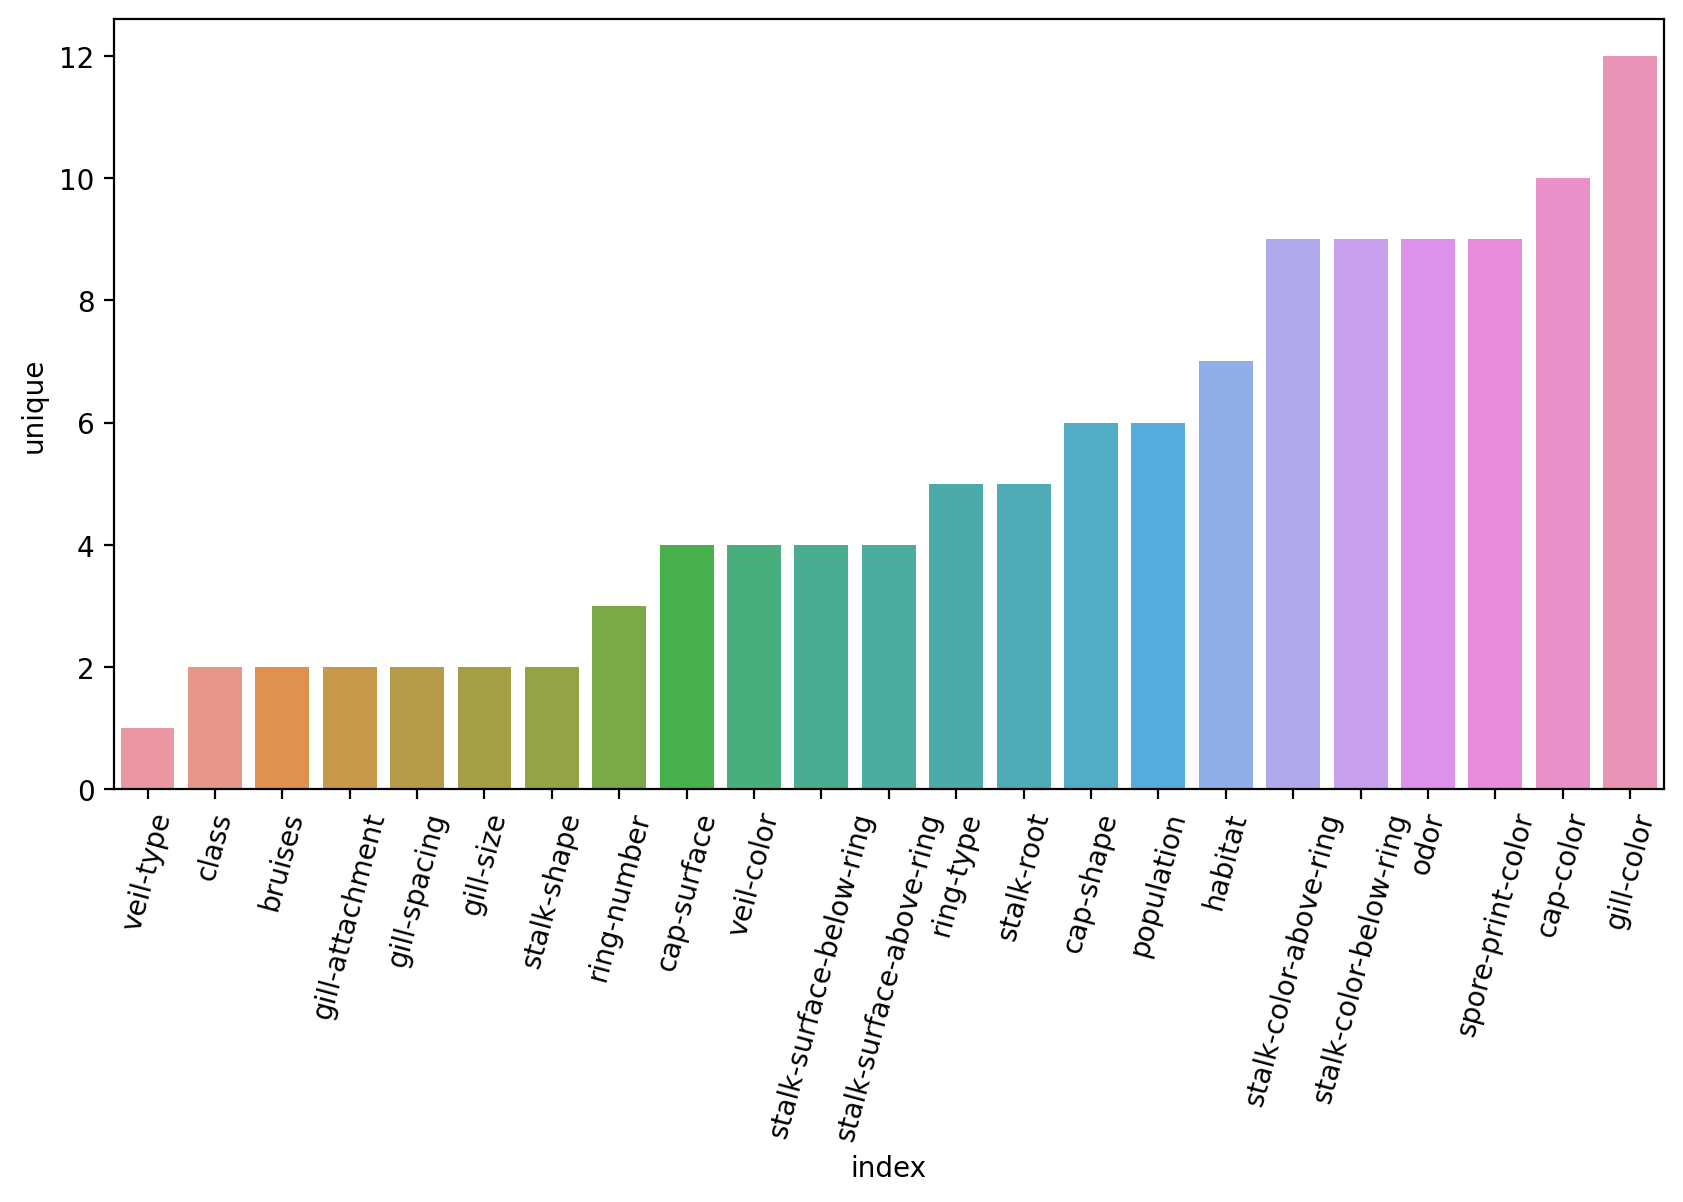

In [14]:
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(data=feat_uni, x="index", y="unique")
plt.xticks(rotation=75);

In [15]:
X = pd.get_dummies(df.drop("class", axis=1), drop_first=True) * 1
y = df["class"]

In [16]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
model = AdaBoostClassifier(n_estimators=1)

In [21]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [23]:
predictions = model.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



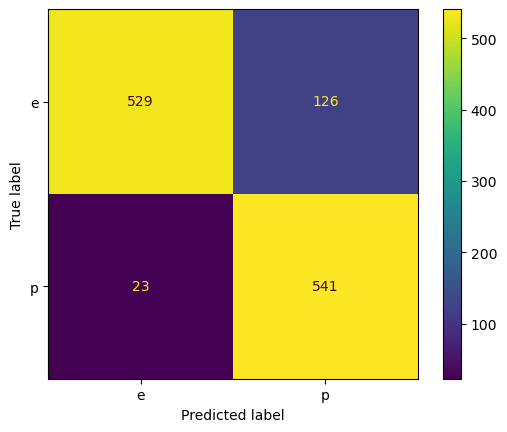

In [26]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [29]:
model.feature_importances_.argmax()

22

In [30]:
X.columns[22]

'odor_n'

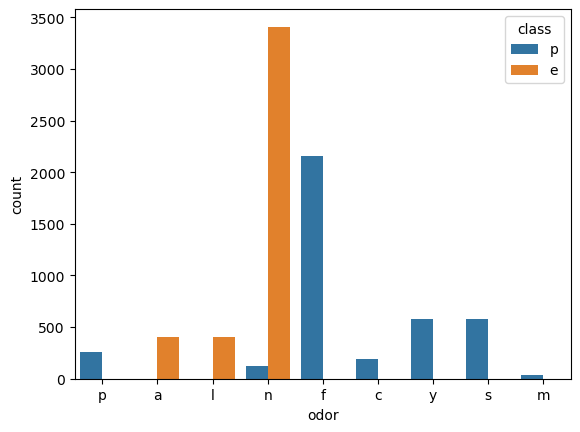

In [34]:
sns.countplot(data=df, x="odor", hue="class");

In [36]:
len(X.columns)

95

In [37]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

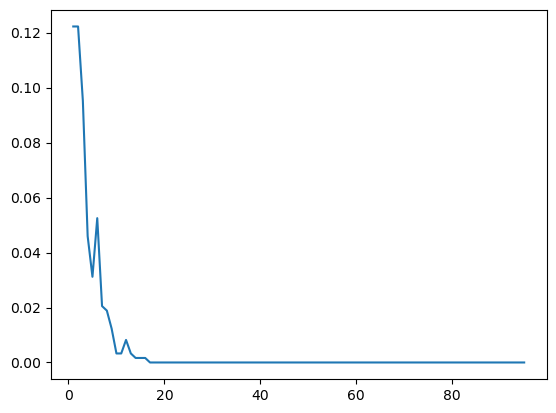

In [38]:
plt.plot(range(1, 96), error_rates)

In [39]:
model = AdaBoostClassifier(n_estimators=18)

In [40]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=18)

In [41]:
preds = model.predict(X_test)

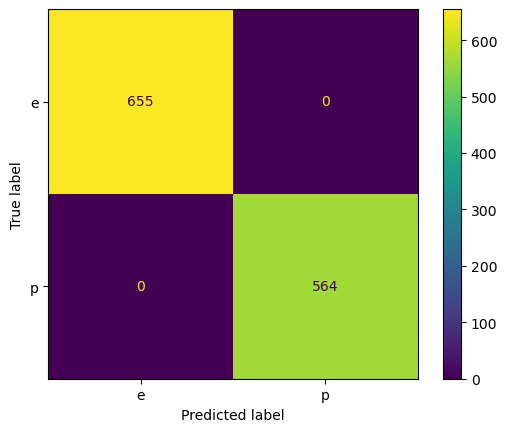

In [43]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [44]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [46]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Importance"])

In [48]:
imp_feats = feats[feats["Importance"] > 0]

In [49]:
imp_feats

,Importance
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_n,0.111111
odor_p,0.055556
gill-size_n,0.166667
stalk-surface-above-ring_k,0.055556
stalk-surface-below-ring_y,0.055556
stalk-color-below-ring_n,0.055556
spore-print-color_r,0.055556


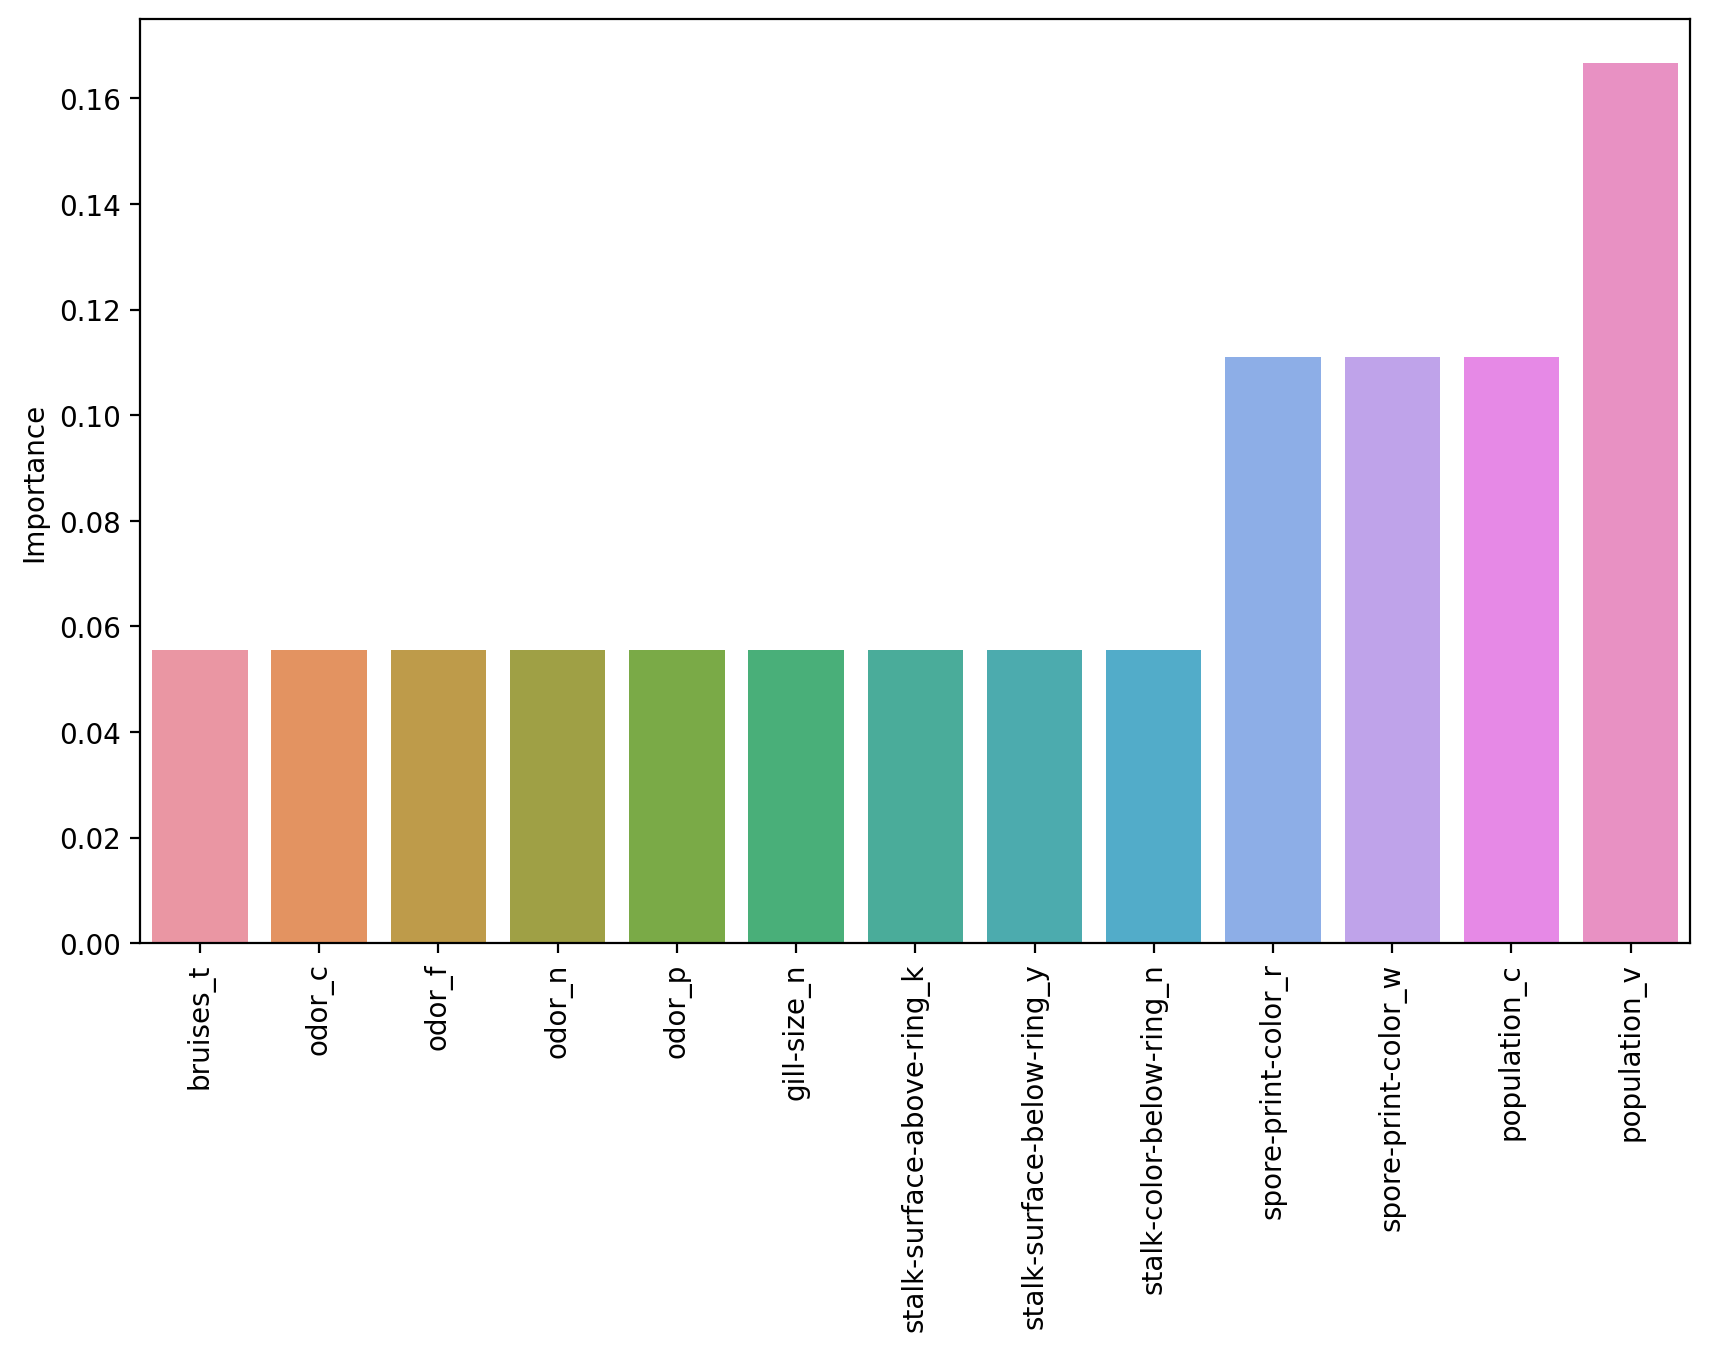

In [52]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(data=imp_feats.sort_values("Importance"), x=imp_feats.index, y="Importance")
plt.xticks(rotation=90);

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {"n_estimators": [50, 100, 128],
             "learning_rate": [0.1, 0.05, 0.2],
             "max_depth": [3, 4, 5]}

In [56]:
gb_model = GradientBoostingClassifier()

In [57]:
grid = GridSearchCV(gb_model, param_grid)

In [58]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 128]})

In [70]:
predictions = grid.predict(X_test)

In [71]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [73]:
feat_imp = grid.best_estimator_.feature_importances_

In [74]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_imp,
                       columns=["Importance"])

In [75]:
imp_feat = imp_feat[imp_feat["Importance"] > 0.0005]

In [67]:
imp_feat

,Importance
cap-surface_g,0.001049
cap-color_y,0.002311
bruises_t,0.052006
odor_c,0.000624
odor_f,0.010142
odor_l,0.018250
odor_n,0.614744
odor_p,0.005611
gill-spacing_w,0.012509
gill-size_n,0.010742


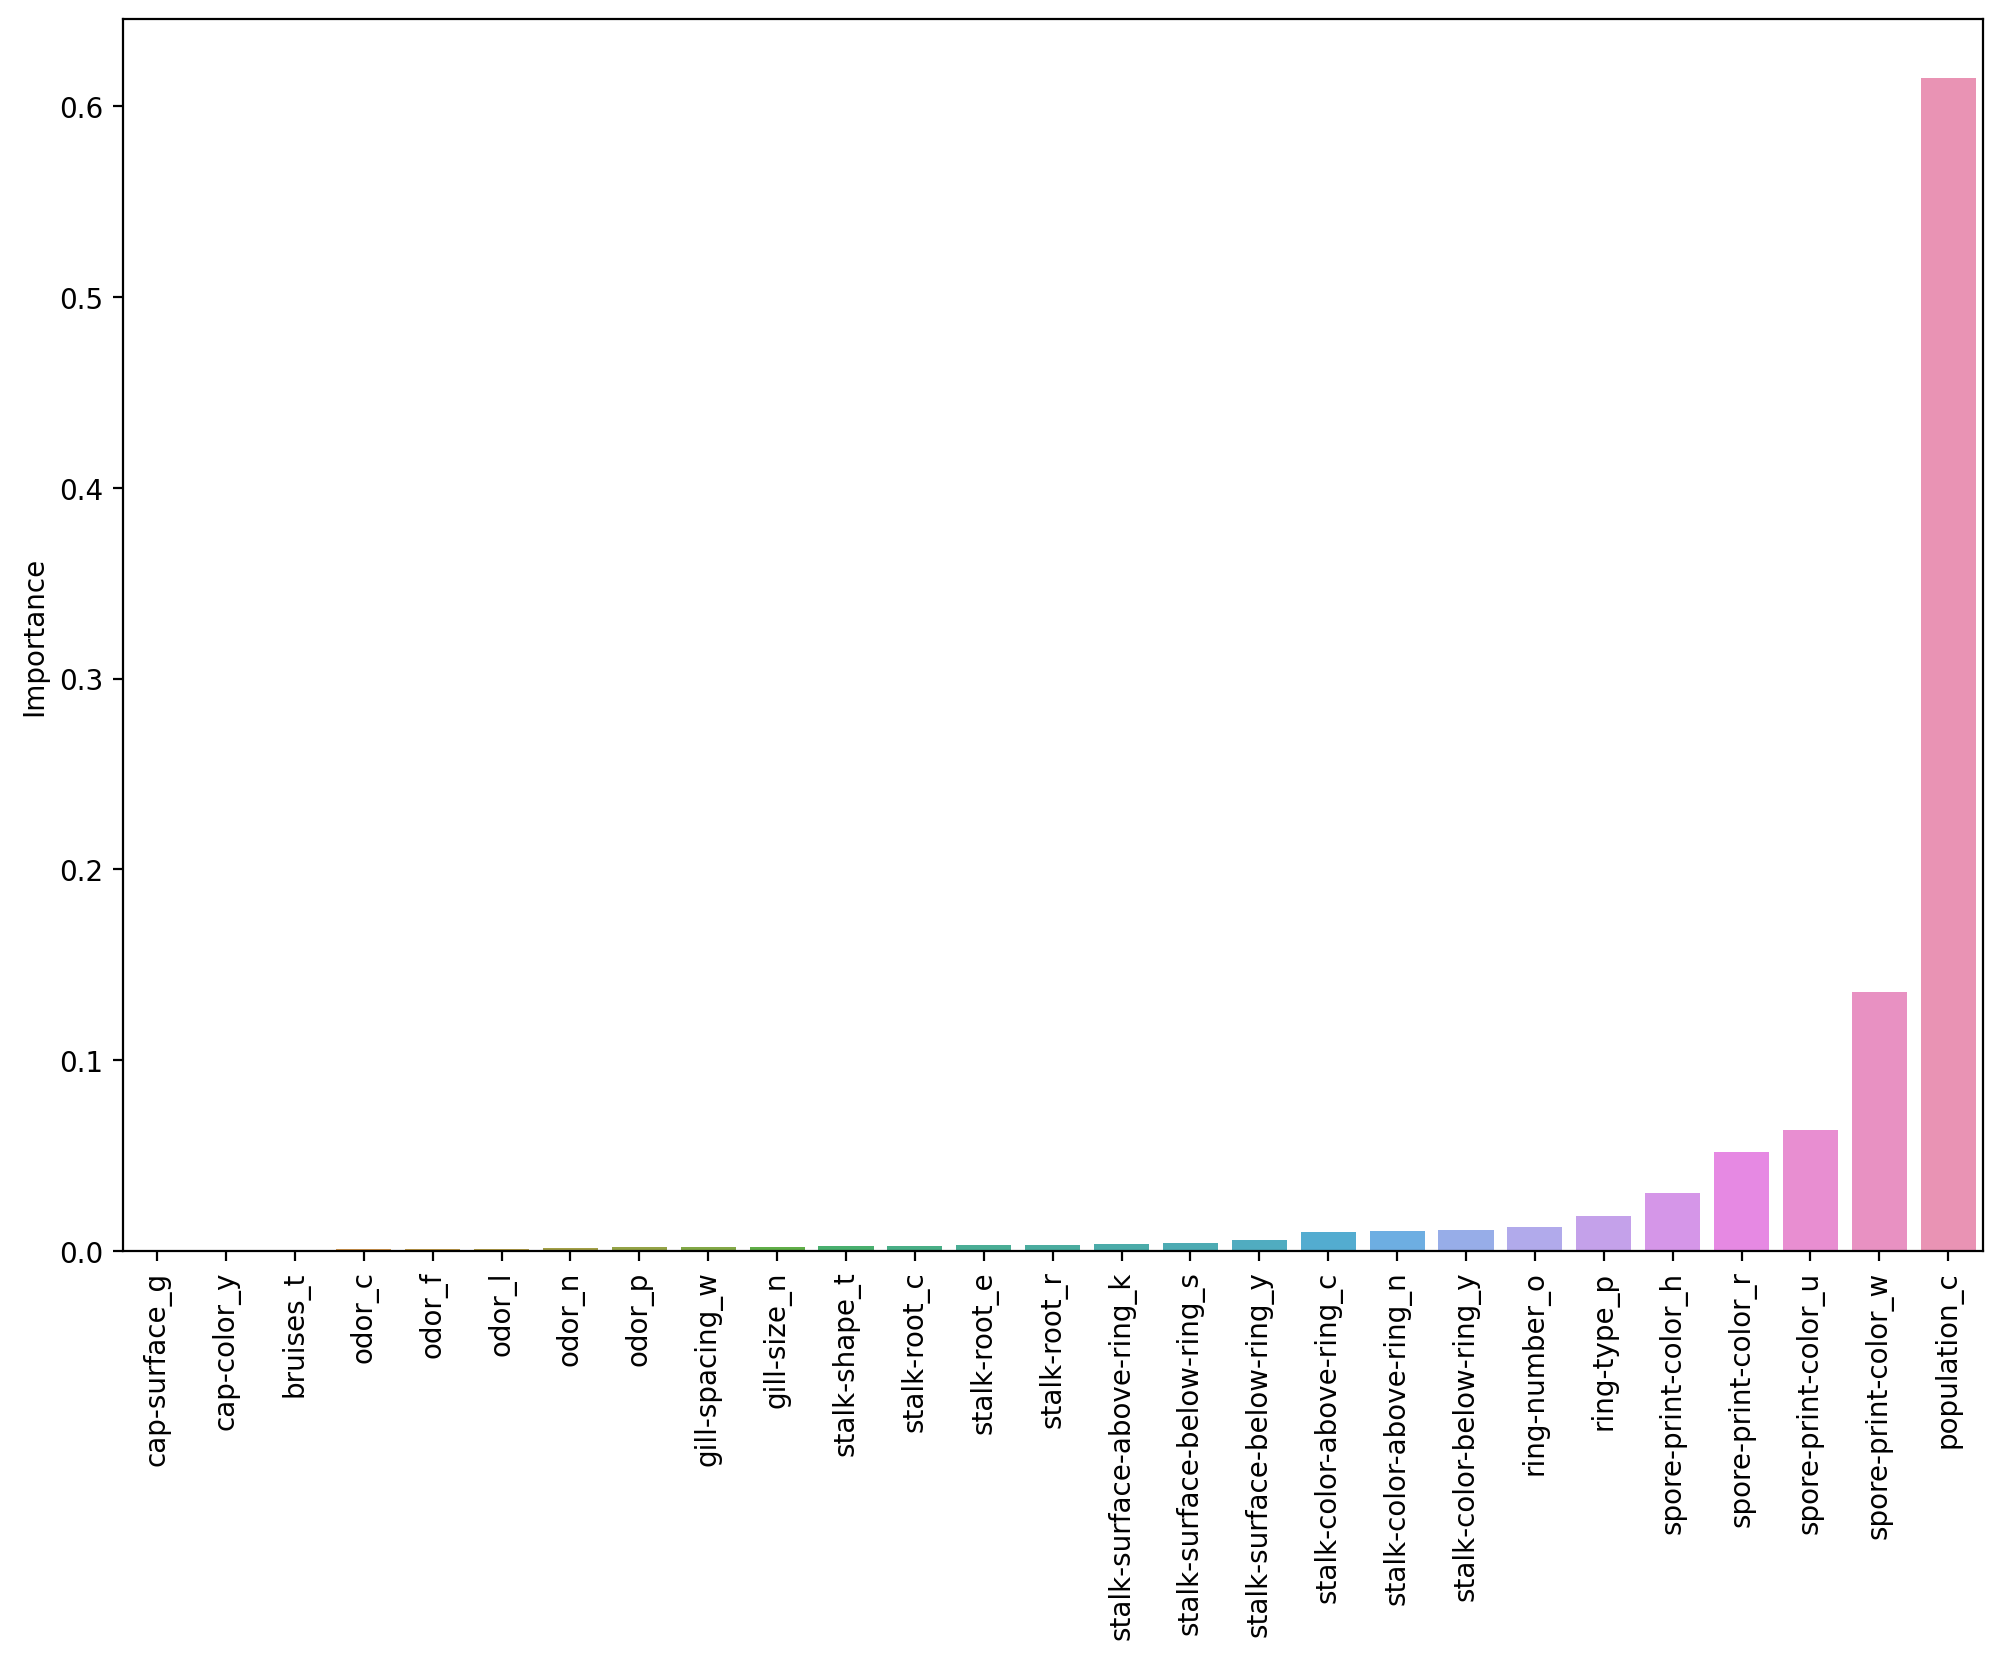

In [76]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_feat.sort_values("Importance"), x=imp_feat.index, y="Importance")
plt.xticks(rotation=90);